In [ ]:
import pandas as pd 
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header = 0)
    df = html[0]
    return df

In [ ]:
df = load_data()
df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [ ]:
sector_unique = df['GICS Sector'].unique()
sector_unique

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

In [ ]:
len(sector_unique)

11

In [ ]:
sector= df.groupby('GICS Sector')

In [ ]:
sector.first()

,Symbol,Security,SEC filings,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
GICS Sector,,,,,,,,
Communication Services,ATVI,Activision Blizzard,reports,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
Consumer Discretionary,AAP,Advance Auto Parts,reports,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
Consumer Staples,MO,Altria Group,reports,Tobacco,"Richmond, Virginia",1957-03-04,764180,1985
Energy,APA,APA Corporation,reports,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,6769,1954
Financials,AFL,Aflac,reports,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott Laboratories,reports,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
Industrials,MMM,3M,reports,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
Information Technology,ACN,Accenture,reports,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products & Chemicals,reports,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [ ]:
sector.describe()

CIK                ...                       
                       count          mean  ...         75%        max
GICS Sector                                 ...                       
Communication Services  26.0  1.115660e+06  ...  1532807.75  1754301.0
Consumer Discretionary  63.0  8.477582e+05  ...  1164229.50  1590895.0
Consumer Staples        32.0  3.872794e+05  ...   789573.00  1679273.0
Energy                  22.0  7.790030e+05  ...  1144876.75  1701605.0
Financials              65.0  6.313738e+05  ...  1120193.00  1601712.0
Health Care             64.0  8.158064e+05  ...  1097811.75  1821825.0
Industrials             74.0  6.859374e+05  ...  1084970.50  1783180.0
Information Technology  74.0  8.987211e+05  ...  1275848.75  1730168.0
Materials               28.0  8.369064e+05  ...  1419355.00  1755672.0
Real Estate             29.0  8.957202e+05  ...  1053507.00  1393311.0
Utilities               28.0  8.035041e+05  ...  1036121.50  1711269.0

[11 rows x 8 columns]

In [ ]:
sector.get_group('Health Care')

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
11,A,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
17,ALXN,Alexion Pharmaceuticals,reports,Health Care,Pharmaceuticals,"Boston, Massachusetts",2012-05-25,899866,1992
...,...,...,...,...,...,...,...,...,...
474,VTRS,Viatris,reports,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
484,WAT,Waters Corporation,reports,Health Care,Health Care Distributors,"Milford, Massachusetts",NaN,1000697,1958
488,WST,West Pharmaceutical Services,reports,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:

! pip install -q streamlit
! pip install -q pyngrok
! pip install -q yfinance

     |████████████████████████████████| 7.8MB 8.7MB/s 
     |████████████████████████████████| 4.2MB 38.6MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 174kB 49.5MB/s 
     |████████████████████████████████| 112kB 46.9MB/s 
     |████████████████████████████████| 122kB 47.8MB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
     |████████████████████████████████| 747kB 8.8MB/s 
     |████████████████████████████████| 6.3MB 15.0MB/s 


In [ ]:
!ngrok authtoken 1sWqvW0WT1M7eMwOooWScuUEVVb_dygp8ekRGPiEiEoPpuWs

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
#!ngrok

In [ ]:
from pyngrok import ngrok

In [ ]:

%%writefile app.py
import pandas as pd
import streamlit as st
import base64
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go





st.set_option('deprecation.showPyplotGlobalUse', False)


st.title('Stock Price Tracking App')


st.markdown("""
This app retrieves the list of the data (from Wikipedia) and its corresponding **stock closing price** (year-to-date)!
* **Python libraries:** base64, pandas, streamlit, matplotlib, yfinance
* **Data source:** [Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).
""")

st.sidebar.header('User Input Features')


# Web scraping of S&P 500 data
#
@st.cache
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header = 0)
    df = html[0]
    return df






df = load_data()
sector = df.groupby('GICS Sector')

# Sidebar - Sector selection
sorted_sector_unique = sorted( df['GICS Sector'].unique() )
selected_sector = st.sidebar.multiselect('Sector', sorted_sector_unique, sorted_sector_unique)


# Filtering data
df_selected_sector = df[ (df['GICS Sector'].isin(selected_sector)) ]

st.header('Display Companies in Selected Sector')
st.write('Data Dimension: ' + str(df_selected_sector.shape[0]) + ' rows and ' + str(df_selected_sector.shape[1]) + ' columns.')
st.dataframe(df_selected_sector)

# Download  data
def filedownload(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode()  # strings <-> bytes conversions
    href = f'<a href="data:file/csv;base64,{b64}" download="SP500.csv">Download CSV File</a>'
    return href




st.markdown(filedownload(df_selected_sector), unsafe_allow_html=True)




# https://pypi.org/project/yfinance/

data = yf.download(
        tickers = list(df_selected_sector[:10].Symbol),
        period = "ytd",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None

    
)




# Plot Closing Price of Query Symbol
def price_plot(symbol):
  df = pd.DataFrame(data[symbol].Close)
  df['Date'] = df.index
  plt.fill_between(df.Date, df.Close, color='blue', alpha=0.3)
  plt.plot(df.Date, df.Close, color='blue', alpha=0.8)
  plt.xticks(rotation=90)
  plt.title(symbol, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.ylabel('Closing Price', fontweight='bold')
  return st.pyplot()

num_company = st.sidebar.slider('Number of Companies', 1, 10)

if st.button('Show Plots'):
    st.header('Stock Closing Price')
    for i in list(df_selected_sector.Symbol)[:num_company]:
        price_plot(i)








Writing app.py


In [ ]:
###Importing the Yfinance library###

In [ ]:
#To install yfinance library

In [ ]:
! pip install -q yfinance

In [ ]:
import yfinance as yf
msft = yf.Ticker('ABBV')
data = msft
data

yfinance.Ticker object <ABBV>

In [ ]:
data = pd.DataFrame()
data =msft.history(period = 'max')
data
#data.to_csv('msft_5d.csv', encoding='utf_8_sig')
#files.download('msft_5d.csv')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-02,24.660341,24.999317,24.081261,24.801580,13767900,0.0,0
2013-01-03,24.716840,24.716840,24.123636,24.596788,16739300,0.0,0
2013-01-04,24.448481,24.639154,24.187190,24.286057,21372100,0.0,0
2013-01-07,24.116576,25.034630,24.116576,24.335495,17897100,0.0,0
2013-01-08,24.215440,24.462607,23.558678,23.805845,17863300,0.0,0
...,...,...,...,...,...,...,...
2021-06-11,116.239998,116.360001,114.870003,115.419998,4469700,0.0,0
2021-06-14,115.070000,115.480003,114.190002,115.400002,4427600,0.0,0
2021-06-15,115.360001,115.940002,114.519997,115.830002,3590500,0.0,0


In [ ]:
#df = pd.DataFrame(data['ABT'].Close)
#df['Date']= data.index

In [ ]:
#list(df.Symbol)

In [ ]:
###Ploting the graph##

In [ ]:
import matplotlib.pyplot as plt

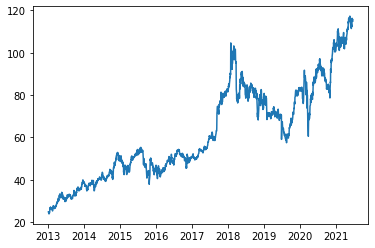

In [ ]:
plt.plot(data['Close'])

In [ ]:
import plotly.graph_objects as go

In [ ]:
# This is a linux command (non Colab notebook commands can be executed by adding a ! beforehand)
# You should see the app.py file in your directory or when you click on the directory icon to the left of the Colab navigation bar
!ls

app.py	sample_data


In [ ]:
# This is a command starting up Streamlit in you Colab environment and running it in the background so you can continue working in the notebook
! streamlit run app.py&>/dev/null&

In [ ]:
# This command establishes a connection ("tunnel") between the Colab environment (which now basically serves a backend) and the domain under which you can review your app
publ_url = ngrok.connect(addr="8501")
publ_url

<NgrokTunnel: "http://6c4810c88338.ngrok.io" -> "http://localhost:8501">